In [ ]:
"""
@author: carolinacorral
"""" 

## Multilayer Perceptron (MLP) XOR

Definición de un Perceptrón multicapa de tres capas, donde la última capa representa la capa de salida. 
$$
H^{(1)} = \phi^{(1)}(XW^{(1)T} + b^{(1)T})
\\
H^{(2)} = \phi^{(2)}H^{(1)}W^{(2)T} + b^{(2)T})
\\
Y = \phi^{(3)}H^{(2)}W^{(3)T} + b^{(3)T}) \\
\text{Donde: } \\
\phi^{(n)} \text{ : Función de activación de la capa n} \\
H^{(n)} \text{ : Salida de la capa n obtenida de  } \phi^{(n)} \\
W^{(n)} \text{ : Vector de pesos de la capa n} \\ 
b^{(n)} \text{ : Vector de bias de la capa n} 
$$

**Ejemplo con XOR (sin backpropagation)**

In [39]:
import numpy as np

# Función sigmode como función de activación.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Inicialización de pesos y bias (de manera implícita)
def init_weight_and_biases():
    W_1 = np.array([[20, 20], [-20, -20]])  # matriz 2x2 para pesos de primera capa
    b_1 = np.array([-10, 30]).reshape((2, 1))  # vector de 2 elementos para bias de primera capa

    W_2 = np.array([[20], [20]])  # matriz 2x1 para pesos segunda capa
    b_2 = np.array([-30]).reshape((1, 1))  # vector de 1 elemento para bias de segunda capa

    return W_1, b_1, W_2, b_2

# Forward pass a través de la red
def forward_pass(x):
    # Entrada a capa oculta
    H_1 = sigmoid(np.dot(x, W_1.T) + b_1.T)
    # Capa oculta a salida
    Y = sigmoid(np.dot(H_1, W_2) + b_2.T)
    return Y

# Inicializar parámetros
W_1, b_1, W_2, b_2 = init_weight_and_biases()

# Prueba para XOR 
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
outputs = np.array([0, 1, 1, 0])  # XOR truth table

# Ejecuta el MLP
for x, y in zip(inputs, outputs):
    output = forward_pass(x)
    print(f"Input: {x}, Predicted: {output.flatten()[0]}, Expected: {y}")



Input: [0 0], Predicted: 4.543910487654591e-05, Expected: 0
Input: [0 1], Predicted: 0.999954519621495, Expected: 1
Input: [1 0], Predicted: 0.999954519621495, Expected: 1
Input: [1 1], Predicted: 4.543910487654591e-05, Expected: 0


# Clasificación con MLP

In [57]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [51]:
def load_data_iris():
    from sklearn import datasets
    iris = datasets.load_iris()
    X, y = iris.data, iris.target
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test
    

Primero, se entrena con 2 capas, 10 y 4 neuronas.

In [60]:
X_train, X_test, y_train, y_test = load_data_iris()

In [54]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 4),max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.63


Tiene una precisión baja. Se utiliza el método SearchGridCV para encontrar los mejores parámetros, se encuentra el mejor:
- Depth/Profundidad (número de capas ocultas)
- Width/Ancho (número de neuronas por capa oculta)
- Función de activación
- Tasa de aprendizaje
- Épocas
- Solver

In [65]:
# Parámetros a probar
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10), (20, 20), (30, 30), (10, 10, 10), (20, 20, 20)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'], 
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500]
}

# Inicializar el MLPClassifier
mlp = MLPClassifier(random_state=42)

# Inicializar el GridSearchCV
grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, verbose=2)

# Entrenar GridSearchCV
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Evaluer el modelo 
best_mlp = grid_search.best_estimator_
y_pred_test = best_mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test accuracy: {test_accuracy:.2f}")


Fitting 3 folds for each of 112 candidates, totalling 336 fits
Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'sgd'}
Best cross-validation accuracy:  0.9833333333333334
Test accuracy: 0.97


c:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10),max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

**Comparación de diferentes funciones de activación.**

Activation function: identity, Test Accuracy: 0.97
Activation function: logistic, Test Accuracy: 0.63
Activation function: tanh, Test Accuracy: 0.97
Activation function: relu, Test Accuracy: 1.00


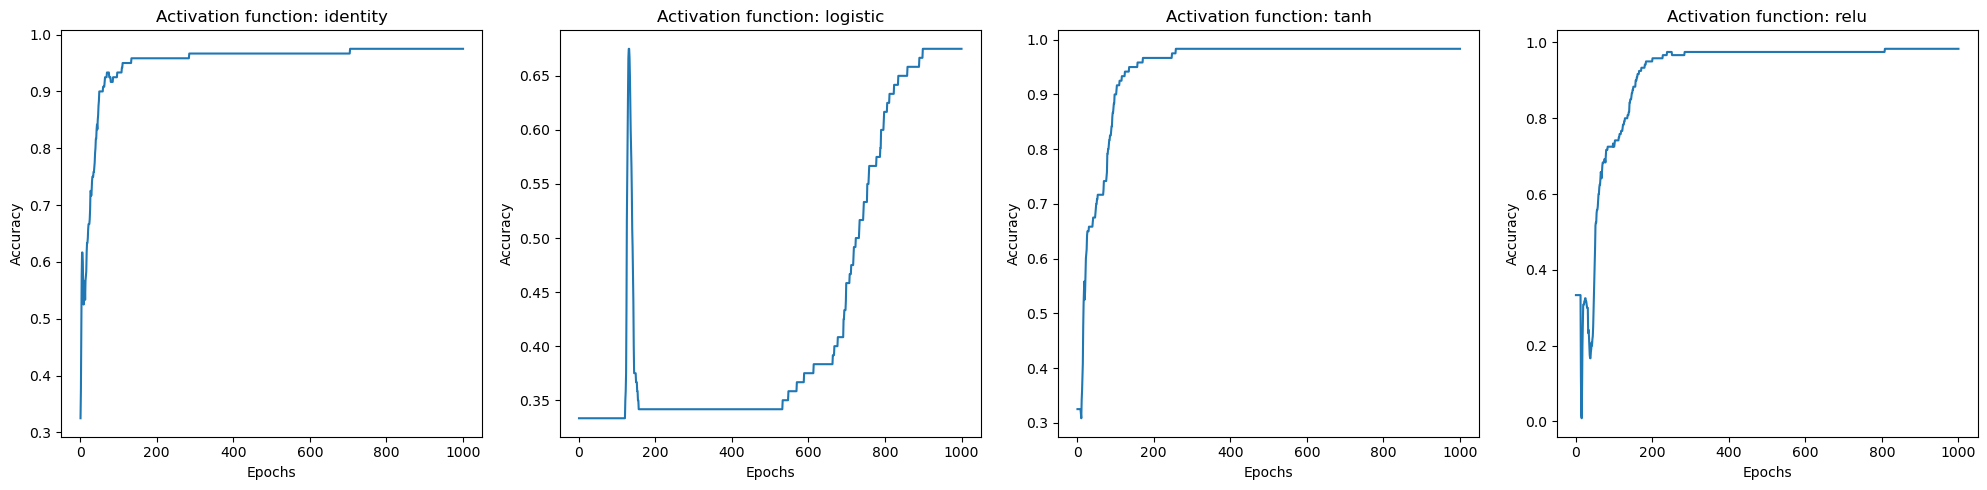

In [66]:
# Funciones de activación
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

fig, axes = plt.subplots(1, len(activation_functions), figsize=(20, 5))

for i, activation in enumerate(activation_functions):
    mlp = MLPClassifier(
        hidden_layer_sizes=(20, 20),
        activation=activation,
        solver='sgd',
        learning_rate='constant',
        max_iter=500,
        random_state=42
    )

    accuracies = []
    for epoch in range(1000):
        mlp.partial_fit(X_train, y_train, classes=np.unique(y))
        y_pred = mlp.predict(X_train)
        accuracies.append(accuracy_score(y_train, y_pred))

    # Predicción con función de activación
    y_pred_test = mlp.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Activation function: {activation}, Test Accuracy: {test_accuracy:.2f}")

    # Grafica precisión vs épocas
    axes[i].plot(range(1, len(accuracies) + 1), accuracies)
    axes[i].set_title(f'Activation function: {activation}')
    axes[i].set_xlabel('Epochs')
    axes[i].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()


# Regresión con MLP 

In [82]:
from sklearn.neural_network import MLPRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def load_data_csv(file):
    dt = pd.read_csv(file)
    X = dt.iloc[:, :-1]
    y = dt.iloc[:, -1]
    
    scaler_X = StandardScaler()
    X = scaler_X.fit_transform(X)
    
    y = y.values.reshape(-1, 1)
    scaler_y = StandardScaler()
    y = scaler_y.fit_transform(y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test


In [95]:
import matplotlib.pyplot as plt
import numpy as np

def plot_real_vs_pred(X_test, y_test, y_pred):
    num_features = X_test.shape[1]
    fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(16, 5), sharey=True)

    for i in range(num_features):
        ax = axes[i] if num_features > 1 else axes  
        
        # Ordenar valores
        sorted_indices = np.argsort(X_test[:, i])
        sorted_X = X_test[sorted_indices, i]
        sorted_y_test = y_test[sorted_indices]
        sorted_y_pred = y_pred[sorted_indices]
        
        ax.plot(sorted_X, sorted_y_test, color='blue', label='Real')
        ax.plot(sorted_X, sorted_y_pred, color='red', linestyle='--', label='Predicción')
        ax.set_xlabel(f'Feature {i+1}')
        if i == 0:
            ax.set_ylabel('Values')
        ax.legend()
    
    fig.suptitle('Real vs Predicción por Característica')
    plt.tight_layout()
    plt.show()


In [80]:
X_train, X_test, y_train, y_test = load_data_csv("Salary_Data.csv")

**Salary Data**

In [83]:
param_grid = {
    'hidden_layer_sizes': [(1,1), (5,), (5, 5), (3, 3)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500]
}
mlp = MLPRegressor(random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

best_params = grid_search.best_params_

best_mlp = MLPRegressor(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver=best_params['solver'],
    learning_rate=best_params['learning_rate'],
    max_iter=best_params['max_iter'],
    random_state=42
)

best_mlp.fit(X_train, y_train)

y_pred_test = best_mlp.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Test Mean Squared Error: {test_mse:.2f}")

Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best parameters found:  {'activation': 'identity', 'hidden_layer_sizes': (5,), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'sgd'}
Best cross-validation score:  -0.041770902591121796
Test Mean Squared Error: 0.06


c:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


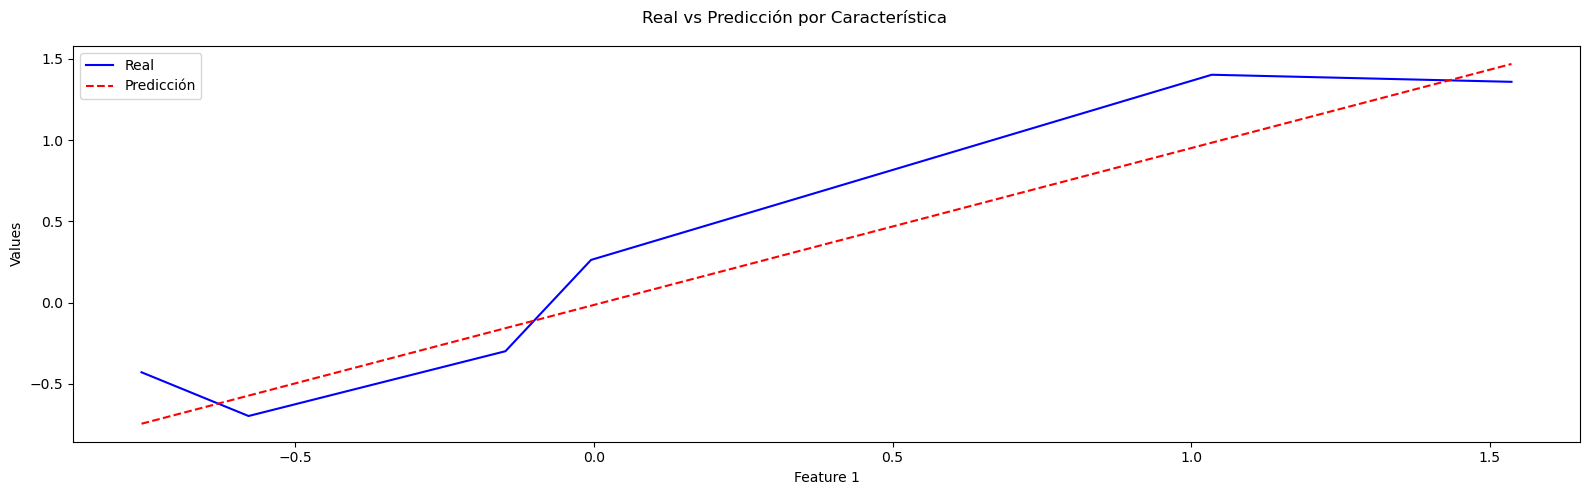

In [96]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(5,), 
    activation='identity', 
    solver='sgd', 
    learning_rate='adaptive', 
    max_iter=500
)

mlp_reg.fit(X_train, y_train)
y_pred = mlp_reg.predict(X_test)
plot_real_vs_pred(X_test,y_test, y_pred)

**House Data**

In [109]:
dt = pd.read_csv("kc_house_data.csv")
dt = dt.drop(columns=['id','date'])
scaler = StandardScaler()

X = dt.drop(columns=['price'])
y = dt['price']

X = scaler.fit_transform(X)
    
y = y.values.reshape(-1, 1)
y = scaler.fit_transform(y)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [103]:
param_grid = {
    'hidden_layer_sizes': [(19,19), (30,), (30, 30), (40, 40),(30,30,30)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [500]
}

mlp = MLPRegressor(random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

best_params = grid_search.best_params_

best_mlp = MLPRegressor(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver=best_params['solver'],
    learning_rate=best_params['learning_rate'],
    max_iter=best_params['max_iter'],
    random_state=42
)

best_mlp.fit(X_train, y_train)

y_pred_test = best_mlp.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Test Mean Squared Error: {test_mse:.2f}")

Fitting 3 folds for each of 120 candidates, totalling 360 fits


c:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:  {'activation': 'logistic', 'hidden_layer_sizes': (30, 30), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
Best cross-validation score:  -0.10728730933029774


c:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Mean Squared Error: 0.12


In [ ]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(30,30), 
    activation='logistic', 
    solver='adam', 
    learning_rate='constant', 
    max_iter=500
)

mlp_reg.fit(X_train, y_train)
y_pred = mlp_reg.predict(X_test)


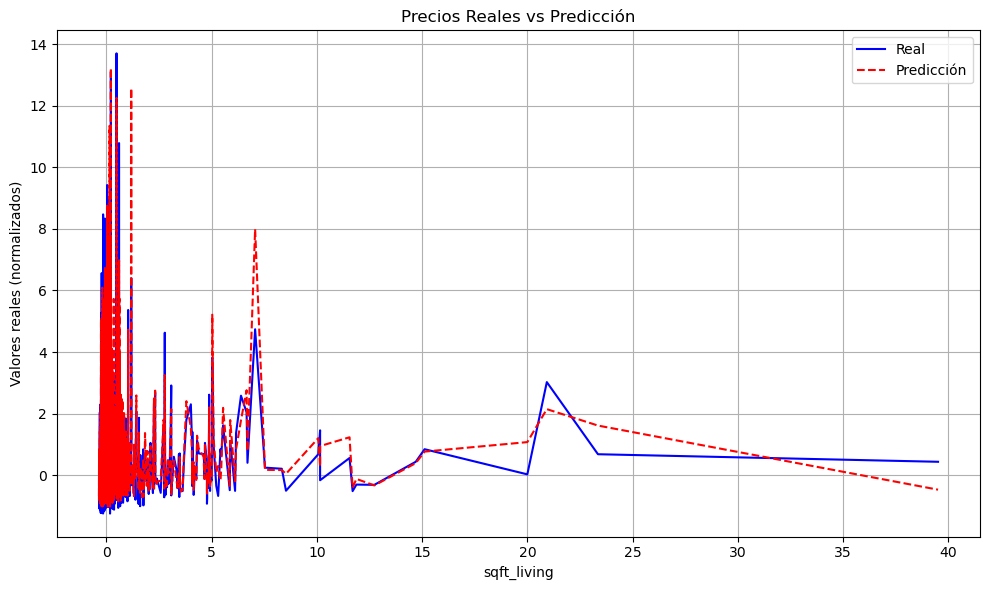

In [120]:
# Extrae 'sqft_living' de X_test
sqft_living = X_test[:, dt.columns.get_loc('sqft_living')]

# Ordena basado en 'sqft_living' 
sorted_indices = np.argsort(sqft_living)
sorted_sqft_living = sqft_living[sorted_indices]
sorted_y_test = y_test[sorted_indices]
sorted_y_pred = y_pred[sorted_indices]

# Grafica
plt.figure(figsize=(10, 6))
plt.plot(sorted_sqft_living, sorted_y_test, color='blue', label='Real')
plt.plot(sorted_sqft_living, sorted_y_pred, color='red', linestyle='--', label='Predicción')
plt.xlabel('sqft_living')
plt.ylabel('Valores reales (normalizados)')  
plt.title('Precios Reales vs Predicción')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**PHermite**

In [121]:
scaler = StandardScaler()

X = pd.read_csv("PHermite_input.txt")
y = pd.read_csv("PHermite_target.txt")

X = X.values.reshape(-1,1)
X = scaler.fit_transform(X)

y = y.values.reshape(-1, 1)
y = scaler.fit_transform(y)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    

In [125]:
param_grid = {
    'hidden_layer_sizes': [(1,1),(1,),(5,5)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs','sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000]
}

mlp = MLPRegressor(random_state=42)

grid_search = GridSearchCV(mlp, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

best_params = grid_search.best_params_

best_mlp = MLPRegressor(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    solver=best_params['solver'],
    learning_rate=best_params['learning_rate'],
    max_iter=best_params['max_iter'],
    random_state=42
)

best_mlp.fit(X_train, y_train)

y_pred_test = best_mlp.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Test Mean Squared Error: {test_mse:.2f}")

Fitting 3 folds for each of 72 candidates, totalling 216 fits


c:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'lbfgs'}
Best cross-validation score:  -0.0001290126270124234


c:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Mean Squared Error: 0.00


In [123]:
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(5,5), 
    activation='tanh', 
    solver='lbfgs', 
    learning_rate='constant', 
    max_iter=500
)

mlp_reg.fit(X_train, y_train)
y_pred = mlp_reg.predict(X_test)


c:\Users\Carolina\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


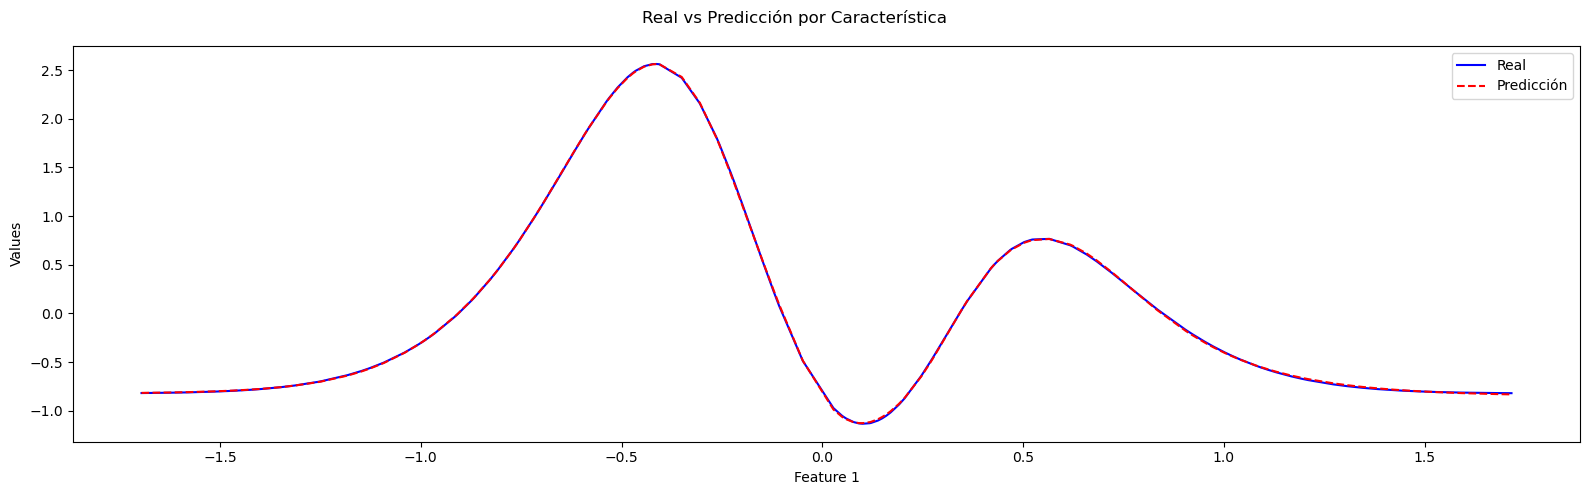

In [124]:
plot_real_vs_pred(X_test,y_test, y_pred)

# Fuentes
https://www.inf.ed.ac.uk/teaching/courses/inf1-cg/lectures/inf1cg_l06_mlps_4up.pdf

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://www.geeksforgeeks.org/classification-using-sklearn-multi-layer-perceptron/

https://satwikgawand.medium.com/fine-tuning-your-multi-layer-perceptron-testing-the-impact-of-model-parameters-e231d78ac2df

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/readings/L05%20Multilayer%20Perceptrons.pdf